In [1]:
#%load_ext snakeviz

# Import data processing modules.
import pandas as pd
import numpy as np

# Import machine learning modules.
import tensorflow as tf
from tensorflow import keras

import wandb
from wandb.keras import WandbCallback

# Import Omphalos modules.
import generate_inputs as gi
import file_methods as fm
import my_metrics as mm
import omphalos_plotter as op
import attributes as attr
import labels as lbls

# Import data visualisation modules.

import seaborn as sns
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
# Unpickle the saved data set.
test_set = fm.unpickle('test.pickle')
train_set = fm.unpickle('train.pickle')

In [11]:
len(train_set)

500

In [3]:
attributes_df = attr.get_condition(train_set, 'Seawater', mineral_volumes = True, species_concs = True)
labels_df = lbls.secondary_precip(train_set, 'Seawater')
labels_df = labels_df.drop(columns = ['X', 'Y', 'Z'])

In [4]:
test_attributes_df = attr.get_condition(test_set, 'Seawater', mineral_volumes=True, species_concs=True)
test_labels_df = lbls.secondary_precip(test_set, 'Seawater')
test_labels_df = test_labels_df.drop(columns = ['X', 'Y', 'Z'])

In [5]:
labels_df.describe()
attributes_df.dtypes

FeS(am)           float64
FeS34(am)         float64
SiO2(am)          float64
Quartz            float64
Siderite          float64
Calcite           float64
Calcite44         float64
K-Feldspar        float64
Kaolinite         float64
C5H7O2NSO4(s)     float64
Fluorapatite      float64
Fluorapatite44    float64
CO2(aq)           float64
O2(aq)            float64
NH3(aq)           float64
Mg++              float64
Al+++             float64
Fe++              float64
Fe+++             float64
Ca++              float64
Ca44++            float64
K+                float64
F-                float64
SO4--             float64
S34O4--           float64
B(OH)3(aq)        float64
HPO4--            float64
H2S(aq)           float64
H2S34(aq)         float64
SiO2(aq)          float64
Na+               float64
Methane(aq)       float64
Cl-               float64
NO3-              float64
Formaldehyde      float64
C5H7O2NSO4        float64
dtype: object

In [6]:
labels_df = labels_df['C5H7O2NSO4(s)']
test_labels_df = test_labels_df['C5H7O2NSO4(s)']

In [6]:
net_precip = pd.DataFrame()

for i, file in enumerate(test_set):
    mineral_diff = test_set[file].calculate_mineral_diff('Seawater')
    net_precip = net_precip.append(mineral_diff['Calcite'])

net_precip.columns = ['calcite_precip']
net_precip.index = np.arange(50)

,FeS(am),FeS34(am),SiO2(am),Quartz,Siderite,Calcite,Calcite44,K-Feldspar,Kaolinite,C5H7O2NSO4(s),...,HPO4--,H2S(aq),H2S34(aq),SiO2(aq),Na+,Methane(aq),Cl-,NO3-,Formaldehyde,C5H7O2NSO4
0,0.00001,4.509001e-07,0.0,0.02,0.0,0.3,0.00636,0.01,0.05,-3.645640e-08,...,1.841867e-07,1.343711e-07,1.909407e-07,3.096219e-08,3.187570e-07,9.716792e-08,5.271855e-08,3.064755e-08,3.146004e-07,1.901405e-08
1,0.00001,4.509001e-07,0.0,0.02,0.0,0.3,0.00636,0.01,0.05,-5.057539e-07,...,4.697310e-08,3.172324e-07,3.787139e-08,4.384556e-08,2.396190e-10,4.348469e-08,1.997224e-07,6.437344e-08,1.814895e-07,2.637791e-07
2,0.00001,4.509001e-07,0.0,0.02,0.0,0.3,0.00636,0.01,0.05,-2.710085e-07,...,3.647384e-09,9.164511e-08,1.851716e-08,6.930069e-08,2.449557e-07,1.757563e-07,4.373144e-08,1.066477e-07,9.222426e-09,1.413461e-07
3,0.00001,4.509001e-07,0.0,0.02,0.0,0.3,0.00636,0.01,0.05,-2.222817e-07,...,2.750608e-07,2.929341e-07,4.793583e-07,1.491774e-08,7.569257e-08,4.240254e-09,2.864412e-07,5.075390e-08,1.115698e-07,1.159324e-07
4,0.00001,4.509001e-07,0.0,0.02,0.0,0.3,0.00636,0.01,0.05,-2.294679e-08,...,2.743762e-08,1.184319e-07,5.109708e-09,7.554942e-08,8.060336e-08,1.100570e-08,1.199645e-07,6.615424e-08,1.141562e-07,1.196804e-08


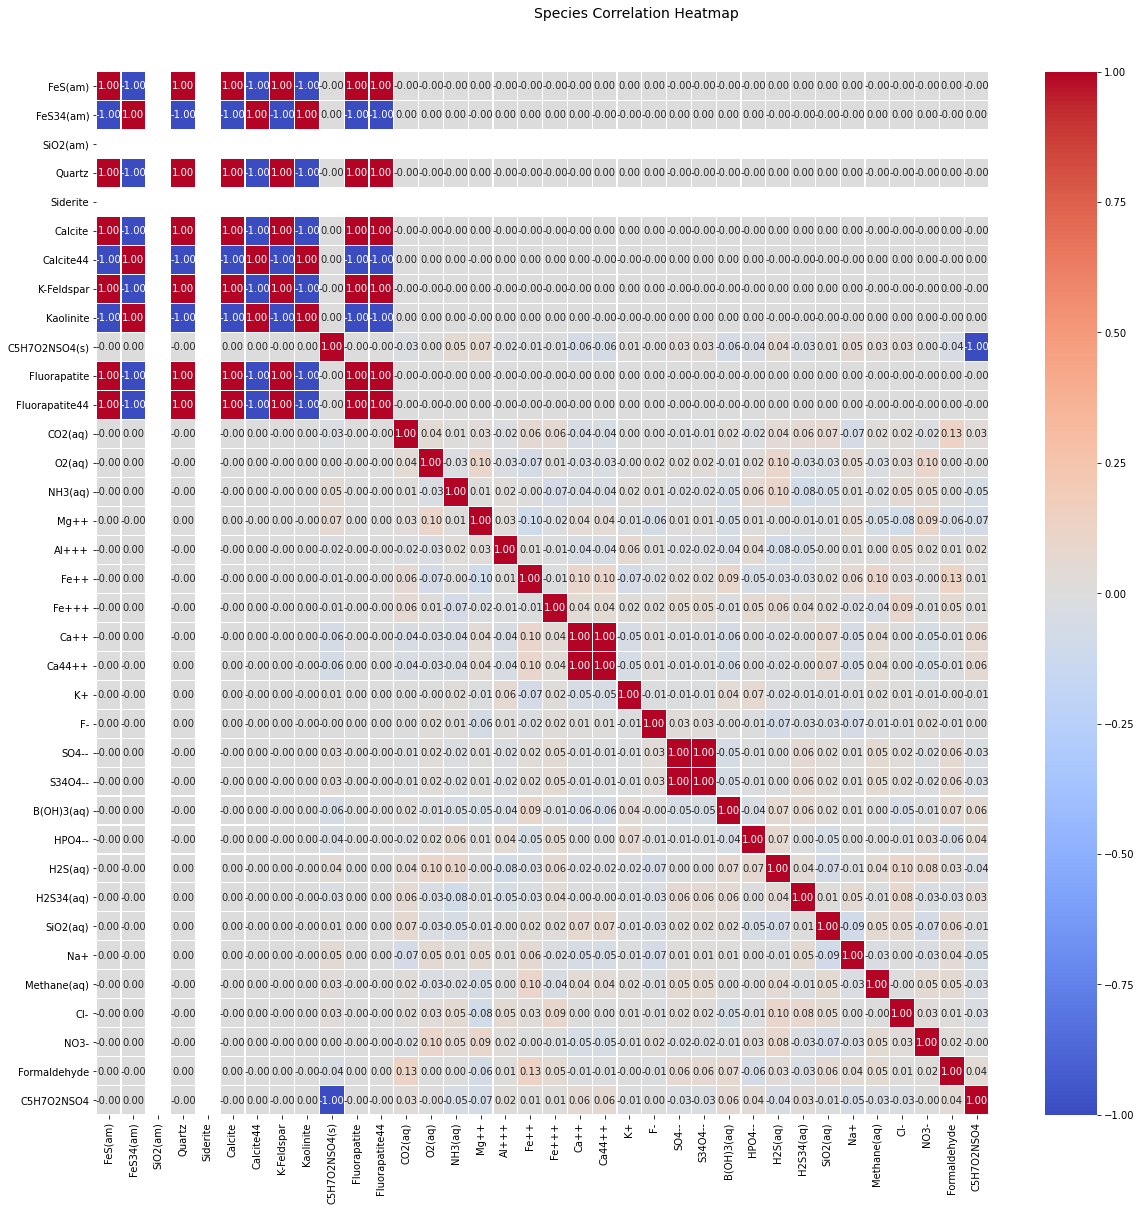

In [13]:
visualise = attributes_df
#visualise['Ca++_out'] = labels_df['Ca++']
#visualise['Ca44++_out'] = labels_df['Ca44++']
#visualise['delCa++_out'] = labels_df['delCa++']
#visualise['SO4--_out'] = labels_df['SO4--']
#visualise['S34O4--_out'] = labels_df['S34O4--']
#visualise['delSO4--_out'] = labels_df['delSO4--']
#visualise['calcite_precip'] = net_precip['calcite_precip']
visualise['C5H7O2NSO4(s)'] = labels_df
display(visualise.head())

f, ax = plt.subplots(figsize=(20, 18))
corr = visualise.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Species Correlation Heatmap', fontsize=14)

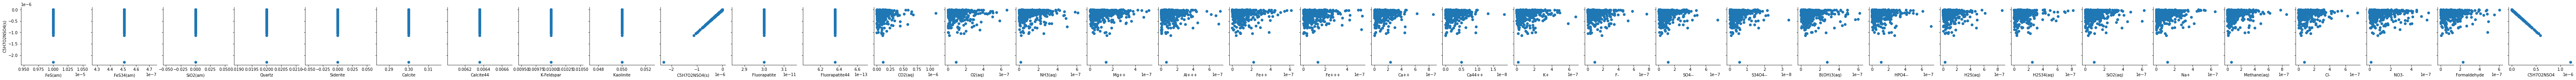

In [14]:
g = op.scatter_attributes(visualise, attributes=attributes_df.columns, labels='C5H7O2NSO4(s)')

In [7]:
# Generate training arrays.
#labels_df = labels_df[['delSO4--', 'delCa++']]
#test_labels_df = test_labels_df[['delSO4--', 'delCa++']]

x_train = attributes_df.to_numpy()
y_train = labels_df.to_numpy()

x_test = test_attributes_df.to_numpy()
y_test = test_labels_df.to_numpy()

In [10]:
metrics = mm.generate_metrics('delCa++', 'delSO4--', labels=labels_df)

{'delCa++': <my_metrics.SpeciesRmse object at 0x149bf2670>, 'delSO4--': <my_metrics.SpeciesRmse object at 0x146923280>}


In [8]:
def train():
    # wandb configuration
    wandb.init(project="secondary-precip-box-model")

    # Hyperparameters defaults.
    wandb.config.dropout = 0.2
    wandb.config.learning_rate = 0.1
    wandb.config.epochs = 100
    wandb.config.batch_size = 50

    # Define the model geometry.
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.1)),
    tf.keras.layers.Dropout(wandb.config.dropout),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

    # Compile the model.
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=wandb.config.learning_rate),
              loss=tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"),
                 metrics=[])

    # Split the dataset into features and label.
    model.fit(x=x_train, y=y_train, batch_size=wandb.config.batch_size, epochs=wandb.config.epochs, validation_data = (x_test, y_test), shuffle=True, verbose=0, callbacks=[WandbCallback()])

In [9]:
train()